In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 4000


#### In this notebook we will first go through the data and check what all preprocessing is required before training our model. In the end we will combine all these steps into a single function which we can then reuse for other similar datasets. In these steps we will also try to understand the data


In [176]:
df = pd.read_csv('listings.csv')
df.head()

/home/addu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1947,https://www.airbnb.com/rooms/1947,20200423041458,2020-04-23,Furnished Gold Coast studio #806,Cozy studio apartment in vintage renovated co...,This is a perfect apartment and location for a...,Cozy studio apartment in vintage renovated co...,none,This location is so convenient. You can walk t...,The building office does not manage this apart...,You're steps away from the red line train and ...,Once you arrive it's like living in your own a...,I live in Indiana and don't always see my gues...,"This is a residential condo building, so I wou...",NaN,NaN,https://a0.muscache.com/im/pictures/40d375a8-5...,NaN,2153,https://www.airbnb.com/users/show/2153,Linda,2008-08-16,"Munster, Indiana, United States",I'm a former university administrator who saw ...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/3c130...,https://a0.muscache.com/im/pictures/user/3c130...,River North,4,4,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Chicago, IL, United States",Near North Side,Near North Side,NaN,Chicago,IL,60610,Chicago,"Chicago, IL",US,United States,41.90246,-87.63405,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,$59.00,$500.00,NaN,$100.00,$0.00,1,$0.00,14,60,14,18,60,60,14.2,60.0,5 weeks ago,t,0,3,3,3,2020-04-23,4,2,2015-03-01,2020-03-29,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,R18000024411,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,moderate,f,f,7,7,0,0,0.06
1,2384,https://www.airbnb.com/rooms/2384,20200423041458,2020-04-23,"Hyde Park - Walk to UChicago, 10 min to McCormick",Visiting The University of Chicago or attendin...,"The private bedroom has a queen size bed, beds...",Visiting The University of Chicago or attendin...,none,My apartment is one block from beautiful Jacks...,The basement laundry room hours are 8:00am to ...,UNIVERSITY OF CHICAGO: Visiting academics and ...,You will have access to the entire apartment -...,I will greet you when you arrive and show you ...,1. Your booking is for ONE (1) person only - t...,NaN,NaN,https://a0.muscache.com/im/pictures/acf6b3c0-4...,NaN,2613,https://www.airbnb.com/users/show/2613,Rebecca,2008-08-29,"Chicago, Illinois, United States",My 2 bdrm apartment is a 2nd floor walk-up in ...,

In [179]:
df.neighbourhood_cleansed.unique()

array(['Near North Side', 'Hyde Park', 'South Lawndale', 'West Town',
       'Lincoln Park', 'Logan Square', 'Uptown', 'North Center',
       'Lake View', 'Irving Park', 'Portage Park', 'Pullman',
       'Near South Side', 'West Ridge', 'Near West Side', 'Edgewater',
       'Bridgeport', 'Woodlawn', 'Albany Park', 'Kenwood', 'Douglas',
       'Rogers Park', 'Lincoln Square', 'Grand Boulevard', 'Forest Glen',
       'Loop', 'Lower West Side', 'Humboldt Park', 'East Garfield Park',
       'North Lawndale', 'Oakland', 'Austin', 'Beverly', 'Chatham',
       'Mckinley Park', 'Avondale', 'Norwood Park', 'Washington Park',
       'Morgan Park', 'Dunning', 'West Lawn', 'South Shore',
       'Armour Square', 'South Deering', 'Auburn Gresham',
       'West Garfield Park', 'Hermosa', 'Hegewisch', 'South Chicago',
       'North Park', 'Greater Grand Crossing', 'Jefferson Park',
       'West Elsdon', 'Ashburn', 'Belmont Cragin', 'Garfield Ridge',
       'Brighton Park', 'Archer Heights', 'Edison Pa

###  Before we proceed forward lets see how are the airbnb distributed in chicago based on various parameters like room type, property type, neighborhood

There are 5792 Entire home/apt which is 67.98% of all the Airbnb
There are 2517 Private room which is 29.54% of all the Airbnb
There are 136 Shared room which is 1.6% of all the Airbnb
There are 75 Hotel room which is 0.88% of all the Airbnb


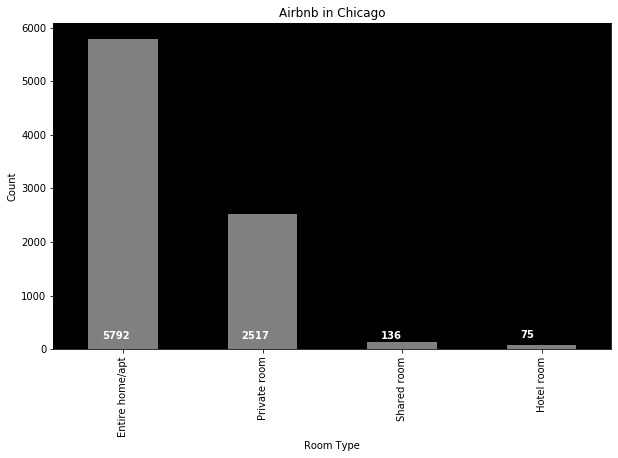

In [163]:
roomtype_group = df.room_type.value_counts()
ax = roomtype_group.plot(kind='bar', title='Airbnb in Chicago',color='grey', figsize=(10,6),fontsize=10)
ax.set(xlabel='Room Type', ylabel='Count', facecolor='black')
for i, v in enumerate(roomtype_group):
    ax.text(i-0.15, i+200 , str(v), color='white', fontweight='bold')
fig = ax.get_figure()
fig.savefig('distribution_room_type.png')
roomtype_group.sum()
for i,type in enumerate(roomtype_group):
    percentage = round(type*100/roomtype_group.sum(),2)
    print('There are {} {} which is {}% of all the Airbnb'.format(type, roomtype_group.index[i], percentage))

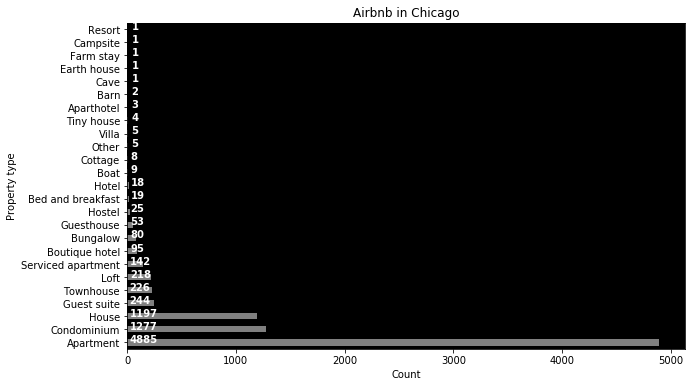

In [164]:
property_type = df.property_type.value_counts()
ax = property_type.plot(kind='barh', title='Airbnb in Chicago',color='grey', figsize=(10,6),fontsize=10)
ax.set(xlabel='Count', ylabel='Property type', facecolor='black')
for i, v in enumerate(property_type):
    ax.text(i+20, i , str(v), color='white', fontweight='bold')
fig = ax.get_figure()
fig.savefig('distribution_property_type.png')


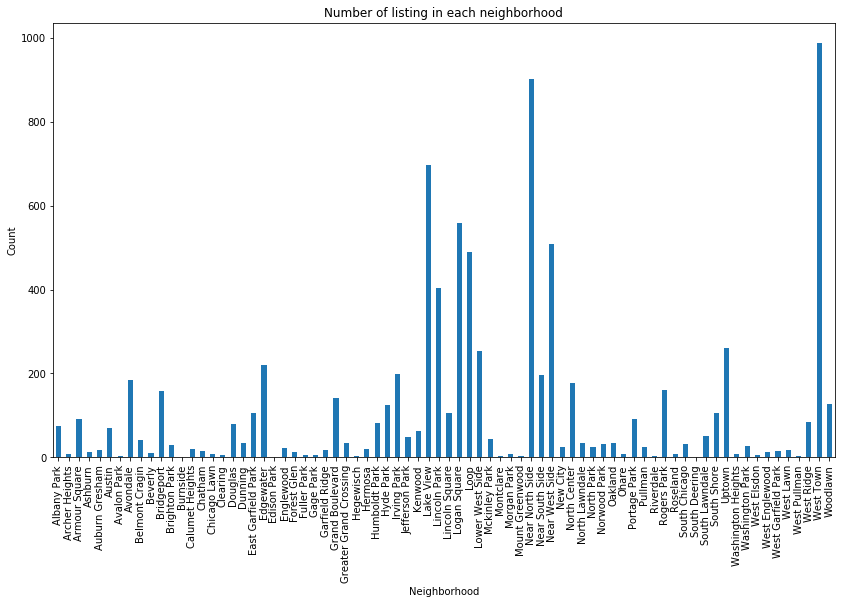

In [182]:
neighbor_distribution = df.groupby(['neighbourhood_cleansed'])['id'].count()
neighbor_distribution.plot.bar(title='Number of listing in each neighborhood',figsize=(14,8))
plt.ylabel('Count')
plt.xlabel('Neighborhood')
plt.savefig('neighborhood.png')


In [165]:
drop_columns = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
 'space', 'description', 'experiences_offered', 'neighborhood_overview',
 'notes', 'transit', 'access', 'interaction', 'house_rules',
 'picture_url', 'host_id', 'host_url', 'host_name', 'host_location','host_about',
 'host_thumbnail_url','host_picture_url','host_has_profile_pic','host_neighbourhood','host_verifications',
 'street','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed',
 'city','state','zipcode','market','smart_location','country_code','country','latitude',
 'longitude','is_location_exact','calendar_updated','availability_30','availability_60',
 'availability_90','availability_365','calendar_last_scraped','jurisdiction_names','license',
 'first_review','last_review'
]

df = df.drop(columns=drop_columns, errors='ignore')

Lets check the size of the data and the null values present in each column

In [166]:
null_values = df.isnull().sum()
percentage_nulls = null_values/df.shape[0]*100

In [167]:
percentage_nulls

id                                                0.000000
thumbnail_url                                   100.000000
medium_url                                      100.000000
xl_picture_url                                  100.000000
host_since                                        0.000000
host_response_time                               12.946009
host_response_rate                               12.946009
host_acceptance_rate                              5.375587
host_is_superhost                                 0.000000
host_listings_count                               0.000000
host_total_listings_count                         0.000000
host_identity_verified                            0.000000
property_type                                     0.000000
room_type                                         0.000000
accommodates                                      0.000000
bathrooms                                         0.046948
bedrooms                                          0.0704

In [168]:
drop_columns = percentage_nulls[percentage_nulls > 50].index
drop_columns

Index(['thumbnail_url', 'medium_url', 'xl_picture_url', 'square_feet',
       'weekly_price', 'monthly_price'],
      dtype='object')

So it seems that there are **8520** AirBnB hosts or to be more accurate properties in Chicago.
The columns above seems to contain data less than 50% so we them. 

In [169]:
df = df.drop(columns=drop_columns)

lets check the five point summary for the numerical columns

In [170]:
df.describe()

,id,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.520000e+03,8520.000000,8520.000000,8520.000000,8516.000000,8514.000000,8479.000000,8520.000000,8520.000000,8520.000000,8520.000000,8520.000000,8520.000000,8.520000e+03,8520.000000,8.520000e+03,8520.000000,8520.000000,7124.000000,7121.000000,7121.000000,7119.000000,7119.000000,7119.000000,7119.000000,8520.000000,8520.000000,8520.000000,8520.000000,7193.000000
mean,2.769100e+07,81.573944,81.573944,4.315376,1.387623,1.647874,2.210402,2.233803,6.299765,676.514319,6.291549,26.443545,811.651291,3.025441e+06,24.993369,2.826992e+06,41.434038,16.526056,95.048147,9.718298,9.560315,9.803484,9.791684,9.707262,9.514398,17.544131,14.759859,2.503404,0.164202,2.067042
std,1.196851e+07,293.198124,293.198124,3.002749,0.777506,1.193994,1.944702,2.076884,18.290056,526.813411,21.292004,118.841795,477.680379,8.054155e+07,114.672481,7.525714e+07,62.973122,21.430506,7.162721,0.706402,0.783283,0.634105,0.645087,0.648115,0.760270,42.113207,41.465465,8.982773,1.253111,1.903729
min,1.947000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.020000
25%,1.924226e+07,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,200.000000,3.600000e+02,1.000000,3.306500e+02,2.000000,1.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.610000
50%,2.987581e+07,2.000000,2.000000,4.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1125.000000,2.000000,2.000000,1125.000000,1.125000e+03,2.000000,1.125000e+03,17.000000,8.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.000000,1.540000
75%,3.847779e+07,11.000000,11.000000,6.000000,2.000000,2.000000,3.000000,2.000000,3.000000,1125.000000,3.000000,4.000000,1125.000000,1.125000e+03,3.100000,1.125000e+03,54.000000,25.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,1.000000,0.000000,3.040000
max,4.325578e+07,2014.000000,2014.000000,37.000000,21.000000,24.000000,50.000000,29.000000,500.000000,9000.000000,730.000000,730.000000,1460.000000,2.147484e+09,730.000000,2.006585e+09,623.000000,439.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,229.000000,229.000000,82.000000,17.000000,29.620000


Well we expected price column to show up here. Lets check the dtype for price or lets check it for all columns and make sure that all the dtypes are proper and modify them if need be

In [171]:
df.dtypes

id                                                int64
host_since                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_listings_count                               int64
host_total_listings_count                         int64
host_identity_verified                           object
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
bed_type                                         object
amenities                                        object
price                                           

It seems like the price and cleaning_fee and many more columns are of dtype object(string) which needs to be modified to float. The special characters present in them also needs to be removed/replaced.

In [172]:
df['price'] = df.price.replace('[$,%]','',regex=True).astype('float')
df['cleaning_fee'] = df.cleaning_fee.replace('[$,%]','',regex=True).astype('float')
df['security_deposit'] = df.security_deposit.replace('[$,%]','',regex=True).astype('float')
df['extra_people'] = df.extra_people.replace('[$,%]','',regex=True).astype('float')
df['host_response_rate'] = df.host_response_rate.replace('[$,%]','',regex=True).astype('float')
df['host_acceptance_rate'] = df.host_acceptance_rate.replace('[$,%]','',regex=True).astype('float')

### We can now check the distribution of price in chicago

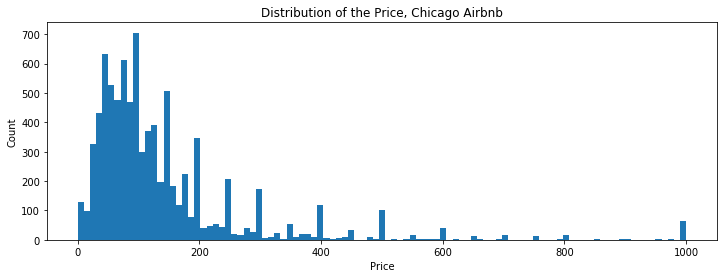

<Figure size 432x288 with 0 Axes>

In [173]:
plt.figure(figsize=(12,4))
plt.title('Distribution of the Price, Chicago Airbnb')
plt.hist(df.price,bins = np.linspace(0,1000,100))
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()
plt.savefig('Price_hist.png')

The max values for price and cleaning_fee are too high compared to 75% of values. For both we drop the rows with value greater than 500 (setting 500 as our max value)

In [116]:
df = df.drop(index = df[(df.price>500)].index)
df = df.drop(index = df[(df.cleaning_fee>500)].index)

In [117]:
df.shape

(8213, 51)

convert the host_since date column to number of days the host has been a host. For this we will use the date of listing i.e., 23 April, 2020. You need to modify this if you update your listing csv.

In [118]:
listing_date = datetime.strptime('2020-04-23','%Y-%m-%d')
df.host_since = df.host_since.apply(lambda x : (listing_date-datetime.strptime(x,'%Y-%m-%d')).days)
df.host_since

0       4268
1       4255
2       4133
3       3992
4       3898
        ... 
8515       3
8516     469
8517       2
8518    1479
8519     574
Name: host_since, Length: 8213, dtype: int64

We can use the amenities column to create multiple categorical columns. In short we need to tranform the amenities column.

In [119]:
amenities = df.amenities.replace('[}{"]','',regex=True).str.get_dummies(sep=',').reset_index(drop=True, inplace=True)
df = pd.concat([df.drop(columns=['amenities']),amenities],axis=1)

In [120]:
df.head()

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1947,4268,within an hour,100.0,100.0,f,4,4,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,59.0,100.0,0.0,1,0.0,14,60,14,18,60,60,14.2,60.0,t,4,2,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,f,f,moderate,f,f,7,7,0,0,0.06
1,2384,4255,within an hour,100.0,100.0,t,1,1,t,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,55.0,0.0,20.0,1,0.0,2,90,2,2,1125,1125,2.0,1125.0,t,178,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,f,strict_14_with_grace_period,f,f,1,0,1,0,2.76
2,4505,4133,within a day,100.0,97.0,t,1,1,t,Apartment,Entire home/apt,7,1.0,3.0,5.0,Real Bed,117.0,0.0,30.0,2,20.0,2,60,2,2,60,60,2.0,60.0,t,394,27,96.0,10.0,9.0,10.0,10.0,9.0,9.0,t,f,f,moderate,f,f,1,1,0,0,2.91
3,7126,3992,within an hour,100.0,100.0,t,2,2,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Futon,80.0,0.0,0.0,1,0.0,2,60,2,2,60,60,2.0,60.0,t,384,48,93.0,10.0,9.0,10.0,10.0,10.0,10.0,t,f,f,moderate,f,f,1,1,0,0,2.92
4,9811,3898,within an hour,100.0,97.0,f,10,10,t,Apartment,Entire home/apt,4,1.0,1.0,0.0,Real Bed,150.0,0.0,85.0,3,25.0,4,180,4,4,180,180,4.0,180.0,t,49,16,92.0,10.0,9.0,10.0,9.0,10.0,9.0,t,t,f,moderate,f,f,11,11,0,0,0.67


We see we have some categorical (dtype=object) columns which contains null values. Lets replace them using the interpolate function from pandas and create dummy columns for each category value.

In [121]:
cats = df.select_dtypes(include=['object'])
cats.isnull().sum()

host_response_time                  1055
host_is_superhost                      0
host_identity_verified                 0
property_type                          0
room_type                              0
bed_type                               0
has_availability                       0
requires_license                       0
instant_bookable                       0
is_business_travel_ready               0
cancellation_policy                    0
require_guest_profile_picture          0
require_guest_phone_verification       0
dtype: int64

In [122]:
for column in cats.columns:
    cats[column] = df[column].interpolate(method='pad')
    dummies = pd.get_dummies(cats[column], prefix=column)
    df = pd.concat([df.drop(columns=[column]),dummies],axis=1)


/home/addu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Continuing with missing values. Replacing the numeric nulls with mode, median or mean as suitable.
lets first check which numeric columns contains null values

In [123]:
df.select_dtypes(include=['int','float']).isnull().sum()

id                                                 0
host_since                                         0
host_response_rate                              1055
host_acceptance_rate                             422
host_listings_count                                0
host_total_listings_count                          0
accommodates                                       0
bathrooms                                          4
bedrooms                                           6
beds                                              41
price                                              0
security_deposit                                2075
cleaning_fee                                     814
guests_included                                    0
extra_people                                       0
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                             0
maximum_minimum_nights                        

We see that bathrooms, beds, bedrooms are whose values can be related to each other. So we can replace the missing values by taking a median of their grouping.
Rest we can replace simply by mean or zeroes.

In [124]:
df.bathrooms = df.bathrooms.fillna(df.groupby('bedrooms')['bathrooms'].transform('median'))
df.beds = df.beds.fillna(df.groupby('bedrooms')['beds'].transform('median'))
df.bedrooms = df.bedrooms.fillna(df.groupby('bathrooms')['bedrooms'].transform('median'))

mean_numerics = ['host_response_rate','host_acceptance_rate','security_deposit','cleaning_fee',
                     'review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                     'review_scores_checkin','review_scores_communication', 'review_scores_location',
                     'review_scores_value','reviews_per_month']

for col in mean_numerics:
        df[col]=df[col].fillna(df[col].mean())

In [125]:
df.isnull().sum()

id                                                 0
host_since                                         0
host_response_time                              1055
host_response_rate                                 0
host_acceptance_rate                               0
host_is_superhost                                  0
host_listings_count                                0
host_total_listings_count                          0
host_identity_verified                             0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms                                          0
bedrooms                                           0
beds                                               1
bed_type                                           0
price                                              0
security_deposit                                   0
cleaning_fee                                  

To improve speed and efficiency of our model we need to scale down few columns.
We can use MinmaxScaler for this purpose

In [130]:
df.describe()

,id,host_since,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.213000e+03,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8212.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.000000,8213.00000,8213.000000
mean,2.759698e+07,0.359829,0.957128,0.904109,78.556313,78.556313,4.153294,1.342506,1.580665,2.098514,125.027030,193.632779,72.167455,2.154511,13.543529,6.394984,673.338731,6.407403,27.007305,811.504566,817.064897,25.689358,815.423499,42.280896,16.745160,0.938162,9.720296,9.558973,9.807575,9.796691,9.702656,9.518938,17.834287,15.011202,2.569341,0.17034,2.083957
std,1.201929e+07,0.195605,0.122033,0.175101,281.278299,281.278299,2.754088,0.656196,1.043140,1.619788,94.624305,305.414085,58.964270,1.875020,20.542561,18.501513,528.155549,21.610518,120.896545,478.294394,473.973401,116.709967,474.810921,63.605071,21.222127,0.081767,0.645220,0.718830,0.577510,0.584981,0.597501,0.694270,42.808116,42.155617,9.135379,1.27591,1.717842
min,1.947000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.00000,0.020000
25%,1.912418e+07,0.200656,0.957128,0.904109,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,60.000000,0.000000,30.000000,1.000000,0.000000,1.000000,30.000000,1.000000,1.000000,200.000000,339.000000,1.000000,300.000000,2.000000,1.000000,0.925000,9.720296,9.000000,9.807575,9.796691,9.702656,9.000000,1.000000,1.000000,0.000000,0.00000,0.770000
50%,2.957594e+07,0.360525,1.000000,0.980000,2.000000,2.000000,4.000000,1.000000,1.000000,2.000000,99.000000,193.632779,65.000000,1.000000,10.000000,2.000000,1125.000000,2.000000,2.000000,1125.000000,1125.000000,2.000000,1125.000000,17.000000,8.000000,0.950000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.000000,0.000000,0.00000,2.030000
75%,3.847963e+07,0.495546,1.000000,1.000000,10.000000,10.000000,6.000000,1.500000,2.000000,3.000000,151.000000,200.000000,95.000000,2.000000,20.000000,3.000000,1125.000000,3.000000,4.000000,1125.000000,1125.000000,3.300000,1125.000000,56.000000,26.000000,0.987500,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,1.000000,0.00000,2.750000
max,4.325578e+07,1.000000,1.000000,1.000000,1602.000000,1602.000000,30.000000,11.000000,12.000000,30.000000,500.000000,5000.000000,450.000000,24.000000,300.000000,500.000000,9000.000000,730.000000,730.000000,1460.000000,1460.000000,730.000000,1460.000000,623.000000,439.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,229.000000,229.000000,82.000000,17.00000,23.930000


In [129]:
scalable_columns = ['host_since','host_response_rate','host_acceptance_rate','review_scores_rating']
minmax_scaler = MinMaxScaler()
df[scalable_columns] = minmax_scaler.fit_transform(df[scalable_columns])

###  Putting it all together in a function

In [131]:
def preprocess_dataframe(df):
    #store starting columns to check the change after preprocessing
    start_columns = df.columns
    #check for null columns and drop if more than 50% data is missing
    null_values = df.isnull().sum()
    percentage_nulls = null_values/df.shape[0]*100
    drop_columns = percentage_nulls[percentage_nulls > 50].index
    df = df.drop(columns=drop_columns)
    
    #drop the columns which are not required
    #cahnging errors param to 'ignore' will ignore error caused if any column is missing from the list
    drop_columns = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
                    'space', 'description', 'experiences_offered', 'neighborhood_overview',
                    'notes', 'transit', 'access', 'interaction', 'house_rules',
                    'picture_url', 'host_id', 'host_url', 'host_name', 'host_location','host_about',
                    'host_thumbnail_url','host_picture_url','host_has_profile_pic','host_neighbourhood','host_verifications',
                    'street','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed',
                    'city','state','zipcode','market','smart_location','country_code','country','latitude',
                    'longitude','is_location_exact','calendar_updated','availability_30','availability_60',
                    'availability_90','availability_365','calendar_last_scraped','jurisdiction_names','license',
                    'first_review','last_review']
    df = df.drop(columns=drop_columns, errors='ignore')
    
    #removing special chars and converting to float
    df['price'] = df.price.replace('[$,%]','',regex=True).astype('float')
    df['cleaning_fee'] = df.cleaning_fee.replace('[$,%]','',regex=True).astype('float')
    df['security_deposit'] = df.security_deposit.replace('[$,%]','',regex=True).astype('float')
    df['extra_people'] = df.extra_people.replace('[$,%]','',regex=True).astype('float')
    df['host_response_rate'] = df.host_response_rate.replace('[$,%]','',regex=True).astype('float')
    df['host_acceptance_rate'] = df.host_acceptance_rate.replace('[$,%]','',regex=True).astype('float')
    
    #drop rows from price and cleaning_fee column which appear to be above a certain value(here 500)
    df = df.drop(index = df[(df.price>500)].index)
    df = df.drop(index = df[(df.cleaning_fee>500)].index)
    
    #convert host_since date to number of days as host
    listing_date = datetime.strptime('2020-04-23','%Y-%m-%d')
    df.host_since = df.host_since.apply(lambda x : (listing_date-datetime.strptime(x,'%Y-%m-%d')).days)
    
    #transform amenities into multiple categorical columns
    amenities = df.amenities.replace('[}{"]','',regex=True).str.get_dummies(sep=',').reset_index(drop=True, inplace=True)
    df = pd.concat([df.drop(columns=['amenities']),amenities],axis=1)
    
    #handling null values in remaining categorical columns and encode them
    cats = df.select_dtypes(include=['object'])
    for column in cats.columns:
        df[column] = cats[column].interpolate(method='pad')
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df.drop(columns=[column]),dummies],axis=1)
        
    #handling null values in numeric columns
    df.bathrooms = df.bathrooms.fillna(df.groupby('bedrooms')['bathrooms'].transform('median'))
    df.beds = df.beds.fillna(df.groupby('bedrooms')['beds'].transform('median'))
    df.bedrooms = df.bedrooms.fillna(df.groupby('bathrooms')['bedrooms'].transform('median'))

    mean_numerics = ['host_response_rate','host_acceptance_rate','security_deposit','cleaning_fee',
                     'review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                     'review_scores_checkin','review_scores_communication', 'review_scores_location',
                     'review_scores_value','reviews_per_month']

    for col in mean_numerics:
        df[col]=df[col].fillna(df[col].mean())
    
    
    #Scaling a few columns
    scalable_columns = ['host_since','host_response_rate','host_acceptance_rate','review_scores_rating']
    minmax_scaler = MinMaxScaler()
    df[scalable_columns] = minmax_scaler.fit_transform(df[scalable_columns])
    
    #return the clean dataframe
    return df

In [132]:
clean_data = preprocess_dataframe(pd.read_csv('listings.csv'))
clean_data.head()

/home/addu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,host_since,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_f,host_is_superhost_t,host_identity_verified_f,host_identity_verified_t,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Campsite,property_type_Cave,property_type_Condominium,property_type_Cottage,property_type_Earth house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,has_availability_t,requires_license_f,requires_license_t,instant_bookable_f,instant_bookable_t,is_business_travel_ready_f,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,1947,1.000000,1.0,1.00,4,4,2,1.0,0.0,1.0,59.0,100.0,0.0,1,0.0,14,60,14,18,60,60,14.2,60.0,4,2,0.9125,10.0,9.0,10.0,10.0,10.0,9.0,7,7,0,0,0.06,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0
1,2384,0.996953,1.0,1.00,1,1,1,1.0,1.0,1.0,55.0,0.0,20.0,1,0.0,2,90,2,2,1125,1125,2.0,1125.0,178,30,1.0000,10.0,10.0,10.0,10.0,10.0,10.0,1,0,1,0,2.76,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,1,0,0,1,0,1,0
2,4505,0.968354,1.0,0.97,1,1,7,1.0,3.0,5.0,117.0,0.0,30.0,2,20.0,2,60,2,2,60,60,2.0,60.0,394,27,0.9500,10.0,9.0,10.0,10.0,9.0,9.0,1,1,0,0,2.91,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0
3,7126,0.935302,1.0,1.00,2,2,2,1.0,1.0,1.0,80.0,0.0,0.0,1,0.0,2,60,2,2,60,60,2.0,60.0,384,48,0.9125,10.0,9.0,10.0,10.0,10.0,10.0,1,1,0,0,2.92,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0
4,9811,0.913268,1.0,0.97,10,10,4,1.0,1.0,0.0,150.0,0.0,85.0,3,25.0,4,180,4,4,180,180,4.0,180.0,49,16,0.9000,10.0,9.0,10.0,9.0,10.0,9.0,11,11,0,0,0.67,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,1,0,0,0,1,0,1,0


In [133]:
print(clean_data.shape)
print(clean_data.isnull().sum())

(8213, 94)
id                                                 0
host_since                                         0
host_response_rate                                 0
host_acceptance_rate                               0
host_listings_count                                0
host_total_listings_count                          0
accommodates                                       0
bathrooms                                          0
bedrooms                                           0
beds                                               1
price                                              0
security_deposit                                   0
cleaning_fee                                       0
guests_included                                    0
extra_people                                       0
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                             0
maximum_minimum_nights             

Great looks our function is working fine. Now we can start looking for answers to our questions

### What is the number of estimated Nights/year in chicago for a host ? 

In [138]:
nights=(clean_data.minimum_nights*clean_data.number_of_reviews).mean()
print('The estimated number of nights per year a host makes money is around :',round(nights))

The estimated number of nights per year a host makes money is around : 117


### Are the listings available for residential housing?

In [141]:
occupancy=nights/365 *100
print('The listings are occupied {}% time of the year'.format(round(occupancy)))

The listings are occupied 32% time of the year


### What is the Average stay price per night in Chicago Airbnbs

In [144]:
stay=clean_data.price.mean()
print('Average stay price is around ${} per night in Chicago Airbnb'.format(round(stay)))

Average stay price is around $125 per night in Chicago Airbnb


### Other questions that can be answered are like average reviews every month , listings rented for more than 30 days which are given below

In [145]:
print('average reviews per month',round(clean_data.reviews_per_month.mean()))
print('total reviews',clean_data.number_of_reviews.sum())
print('Percentage of listings rented for more than 30 days {}%'.format(clean_data[clean_data['minimum_nights']>30]['id'].count()/clean_data.shape[0] *100))

average reviews per month 2
total reviews 347253
Percentage of listings rented for more than 30 days 5.393887738950444%


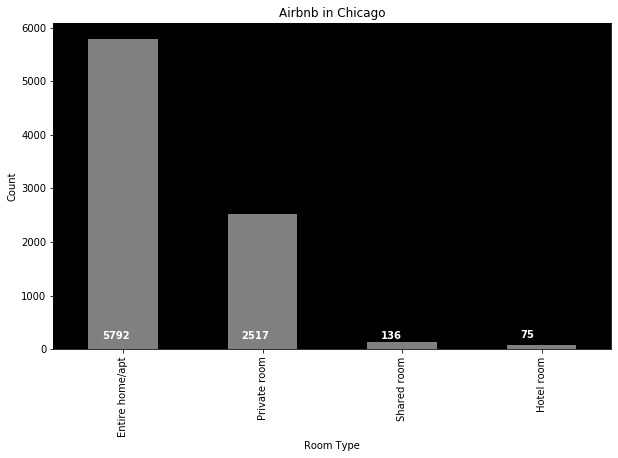

There are 5792 Entire home/apt which is 67.98% of all the Airbnb
There are 2517 Private room which is 29.54% of all the Airbnb
There are 136 Shared room which is 1.6% of all the Airbnb
There are 75 Hotel room which is 0.88% of all the Airbnb


In [ ]:
df['estimated_night'] = 